# ANOP330 Assignment: EDA and Prep with Insurance Data
## Yuqin Yang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Read in data

In [2]:
os.getcwd()

'C:\\Users\\Yuqin Yang\\documents\\ANOP330\\Assignment'

In [3]:
os.chdir('C:\\Users\\Yuqin Yang\\documents\\ANOP330\\Data')
insure_df = pd.read_csv("Insurance.csv")

In [4]:
insure_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2. Explore the data

In [5]:
insure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insure_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### The values seems reasonable that the maximum age is 64 while minimum age is 18; maximum bmi is 53.13 while minumum bmi is 15.96; maximum children number is 5 while the minimun children number is 0; and the charges varies from 1121 to 63770. These numbers are all reasonable, and there is no null value needs to be dealt with.

### 3. Change the datatypes

In [7]:
obj_cols =(insure_df.select_dtypes(include=["object"]).columns.tolist())
obj_cols

['sex', 'smoker', 'region']

In [8]:
insure_df[obj_cols] = insure_df[obj_cols].astype('category')
insure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### 4a. The distribution of categorical columns

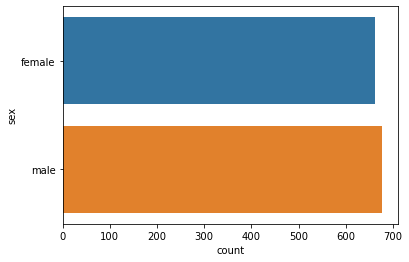

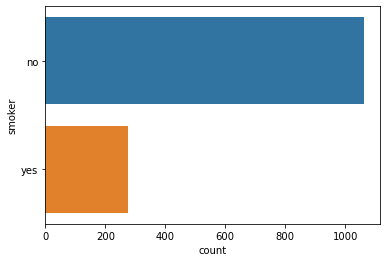

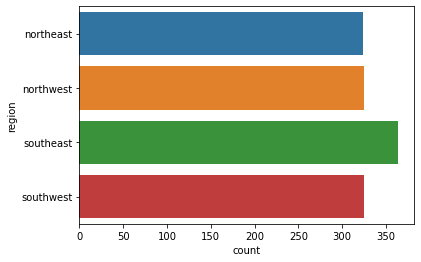

In [9]:
for column in obj_cols:
        sns.countplot(y=column, data=insure_df)
        plt.show()

### 4b. Correlation heatmap for the numerical columns

In [10]:
num_cols =(insure_df.select_dtypes(include=["int","float"]).columns.tolist())
num_cols

['age', 'bmi', 'children', 'charges']

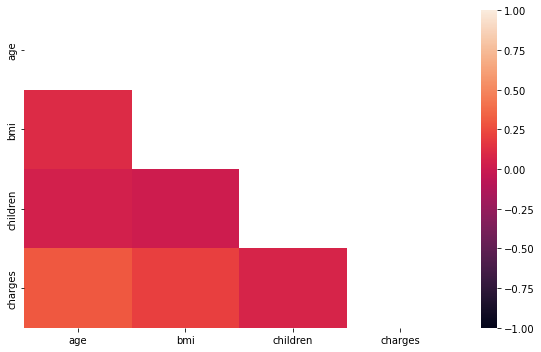

In [11]:
plt.figure(figsize=(8,5))
corr_matrix = insure_df[num_cols].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=False, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

##### It shows a strong correlation between age and charges; and between bmi and charges, while other correlations are relatively weaker, almost with no correlations.

### 4c. The distribution of the prediction target variable ("charges")

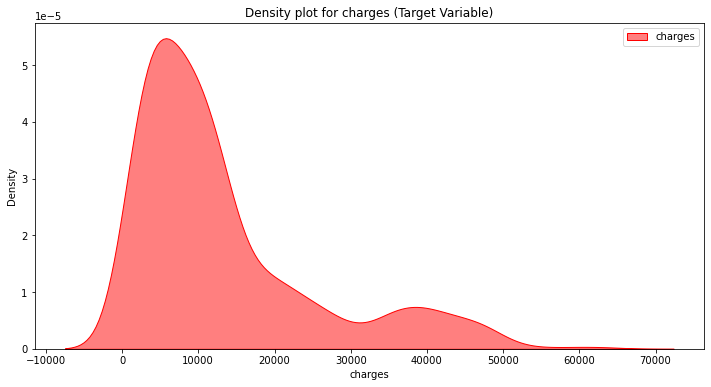

In [12]:
plt.figure(figsize=(12,6))
plt.title('Density plot for charges (Target Variable)')
sns.kdeplot(insure_df['charges'], color="red", alpha=.5, shade=True)
# plt.grid()
plt.legend(['charges'])
plt.show()

### 5a. Relationship between bmi and charges by smoker

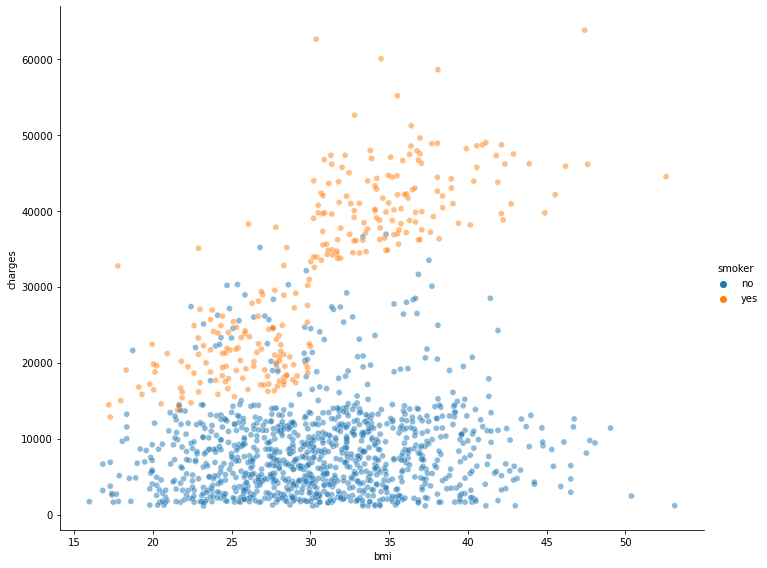

In [13]:
sns.relplot(x='bmi',y='charges',data=insure_df, hue='smoker', alpha=0.5, height=8, aspect=10/8);

##### Smoking seems a relevant predictor that smokers are more likely to have higher charges with same bmi

### 5b. Groupby method for smokers and its impact on mean charges

In [14]:
insure_df.groupby('smoker').charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

##### Smokers have higher mean charges in insurance, which is 32050, than those who do not smoke, which is 8434

### 5c. Groupby method for region and its impact on mean charges

In [15]:
insure_df.groupby('region').charges.mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

##### People in southeast have the highest mean charges in insurance, which is 14735, while people in southwesst have the lowest mean charges in insurance, which is 12346

### 6. Use boxplot to compare the impact of ‘region’ on charges in a single chart

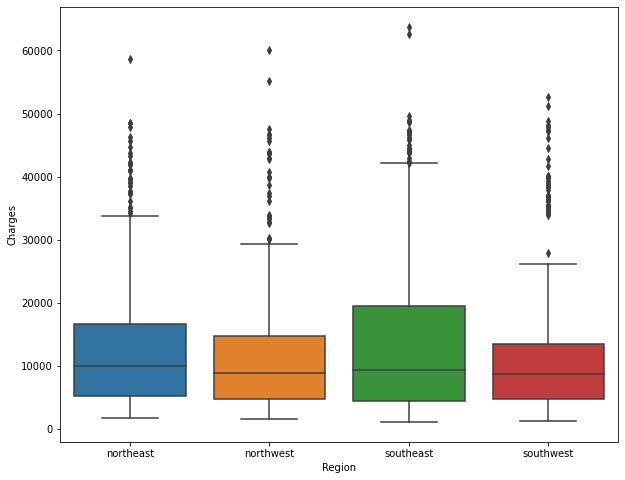

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = insure_df.region, y = insure_df.charges, ax=ax)
ax.set_ylabel("Charges")
ax.set_xlabel("Region");

##### All four regions' charges in insurance are normally distributed or positive skewed with almost same median value. The distribution in southeast has the widest range and the largest outlier.

### 7. Create a new field about North and South

In [20]:
def get_region_nors(row):
    if 'north' in row['region']:
        return 'North'
    else:
        return 'South'
    
insure_df['Region_NorS'] = insure_df.apply(get_region_nors, axis=1)
insure_df.head()

,age,sex,bmi,children,smoker,region,charges,Region_NorS
0,19,female,27.900,0,yes,southwest,16884.92400,South
1,18,male,33.770,1,no,southeast,1725.55230,South
2,28,male,33.000,3,no,southeast,4449.46200,South
3,33,male,22.705,0,no,northwest,21984.47061,North
4,32,male,28.880,0,no,northwest,3866.85520,North


In [21]:
def get_region_nors(row):
    if row['northeast'] | row['northwest']:
        return 'North'
    else:
        return 'South'
    
region_dummies = pd.get_dummies(insure_df['region'])
insure_df['Region_NorS'] = region_dummies.apply(get_region_nors, axis=1)

insure_df.head()

,age,sex,bmi,children,smoker,region,charges,Region_NorS
0,19,female,27.900,0,yes,southwest,16884.92400,South
1,18,male,33.770,1,no,southeast,1725.55230,South
2,28,male,33.000,3,no,southeast,4449.46200,South
3,33,male,22.705,0,no,northwest,21984.47061,North
4,32,male,28.880,0,no,northwest,3866.85520,North


### 8. get_dummies

In [19]:
pd.get_dummies(insure_df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1
